<h1 style="text-align: center; font-weight: bolder">
    PCA
</h1>

**Análisis de Componentes Principales**

Consiste en reducir la dimensionalidad de nuestro dataset para mejorar el desempeño de nuestros algoritmos de Machine Learning

**¿Cuándo usar PCA?**

- El dataset tiene muchos features
- Hay correlación entre los features
- Existe Overfitting
- El modelo genera un alto costo computacional

**Procedimiento**

1. Calculamos la matriz de Covarianza para expresar la relación de nuestros features.
2. Hallamos los vectores propios y valores propios de esta matriz para medir la fuerza y variabilidad de estas relaciones.
3. Ordenamos y escogemos los vectores propios con mayor variabilidad, esto es, que aportan más información.

## **Librerias**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import sklearn

from sklearn.decomposition import PCA, IncrementalPCA, KernelPCA
from sklearn.linear_model import LogisticRegression

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.metrics import confusion_matrix

## **Datos**

### **1. Cargue de los datos**

In [3]:
# Cargamos nuestro dataset
df = pd.read_csv('./data/heart.csv')

In [4]:
df.sample()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
188,63,1,0,130,254,0,0,147,0,1.4,1,1,3,0


In [5]:
# Separamos los features del target de nuestro dataset
features = df.drop(['target'], axis=1)
target = df['target']

In [6]:
features.sample()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
485,62,1,1,120,281,0,0,103,0,1.4,1,1,3


### **2. Limpieza de los datos**

In [7]:
# Normalizamos los datos
normal_features = StandardScaler().fit_transform(features)

In [8]:
# Separamos nuestro dataset entre entrenamiento y test
X_train, X_test, y_train, y_test = train_test_split(normal_features, target, test_size=0.3, random_state=13)

### **3. Análisis de Componentes Principales**

In [9]:
# Configuramos el algoritmo
pca = PCA(n_components=3) 

In [10]:
# Entrenamos el algoritmo
pca.fit(X_train)

PCA(n_components=3)

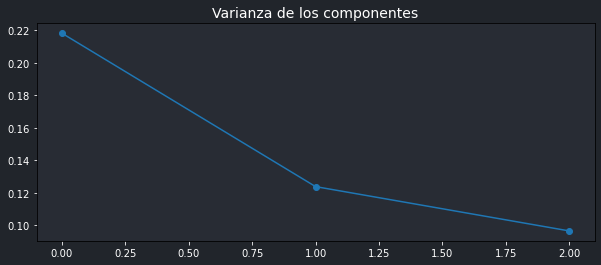

In [11]:
fig, ax = plt.subplots(figsize=(10, 4))

fig.patch.set_facecolor('#21252b') 
ax.set_facecolor('#282c34') 

plt.plot(
    range(0, len(pca.explained_variance_)),
    pca.explained_variance_ratio_,
    marker='o')

ax.tick_params(axis='x', which='both', colors='white')
ax.tick_params(axis='y', which='both', colors='white')

plt.title('Varianza de los componentes', color='white', fontsize=14)
plt.show()

El  valor del eje y, el **ratio de varianza**, nos demuestra cuanta información  nos aporta cada componente

In [12]:
# Aplicamos el algoritmo PCA a nuestro dataset
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

#### **Análisis de Componentes Principales Incremental**

In [13]:
# Configuramos el algoritmo Incremental PCA
i_pca = IncrementalPCA(n_components=3, batch_size=10)

In [14]:
i_pca.fit(X_train)

IncrementalPCA(batch_size=10, n_components=3)

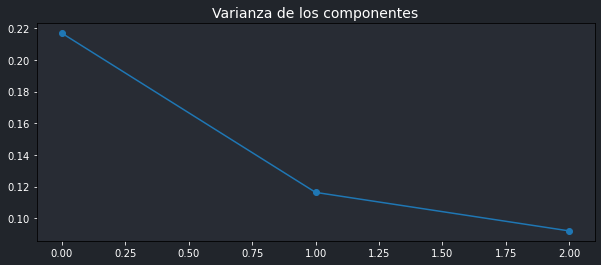

In [15]:
fig, ax = plt.subplots(figsize=(10, 4))

fig.patch.set_facecolor('#21252b') 
ax.set_facecolor('#282c34') 

plt.plot(
    range(0, len(i_pca.explained_variance_)),
    i_pca.explained_variance_ratio_,
    marker='o')

ax.tick_params(axis='x', which='both', colors='white')
ax.tick_params(axis='y', which='both', colors='white')

plt.title('Varianza de los componentes', color='white', fontsize=14)
plt.show()

In [16]:
# Aplicamos el algoritmo PCA a nuestro dataset
X_train_ipca = i_pca.transform(X_train)
X_test_ipca = i_pca.transform(X_test)

#### **Análisis de Componentes Principales - Kernels**

In [17]:
# Configuramos el algoritmo
kernel_pca = KernelPCA(n_components=4, kernel='poly') 

In [18]:
# Entrenamos el algoritmo
kernel_pca.fit(X_train)

KernelPCA(kernel='poly', n_components=4)

In [19]:
# Aplicamos el algoritmo PCA a nuestro dataset
X_train_kpca = kernel_pca.transform(X_train)
X_test_kpca = kernel_pca.transform(X_test)

### **4. Modelo de Regresión Logística**

#### **Con PCA**

In [20]:
# Instanciamos el modelo
logistic_reg_pca = LogisticRegression(solver='lbfgs')

In [21]:
# Entrenamos el modelo
logistic_reg_pca.fit(X_train_pca, y_train)

LogisticRegression()

In [22]:
# Evaluamos el score de nuestro modelo
logistic_reg_pca.score(X_test_pca, y_test)

0.8344155844155844

In [23]:
# Predicción del modelo
y_pred_pca = logistic_reg_pca.predict(X_test_pca)

In [24]:
cf_matrix = confusion_matrix(y_test, y_pred_pca)

<AxesSubplot:>

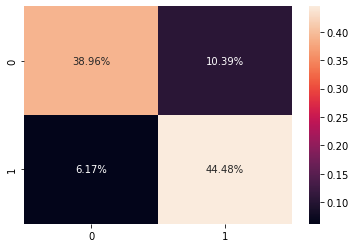

In [25]:
sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, fmt='.2%')

#### **Con IPCA**

In [26]:
# Instanciamos el modelo
logistic_reg_ipca = LogisticRegression(solver='lbfgs')

In [27]:
# Entrenamos el modelo
logistic_reg_ipca.fit(X_train_ipca, y_train)

LogisticRegression()

In [28]:
# Evaluamos el score de nuestro modelo
logistic_reg_ipca.score(X_test_ipca, y_test)

0.8409090909090909

In [29]:
# Predicción del modelo
y_pred_ipca = logistic_reg_ipca.predict(X_test_ipca)

In [30]:
cf_matrix = confusion_matrix(y_test, y_pred_ipca)

<AxesSubplot:>

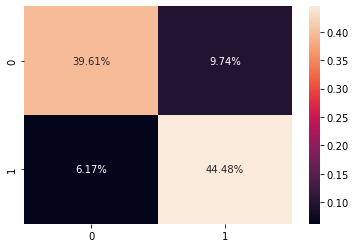

In [31]:
sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, fmt='.2%')

#### **Con KPCA**

In [32]:
# Instanciamos el modelo
logistic_reg_kpca = LogisticRegression(solver='lbfgs')

In [33]:
# Entrenamos el modelo
logistic_reg_kpca.fit(X_train_kpca, y_train)

LogisticRegression()

In [34]:
# Evaluamos el score de nuestro modelo
logistic_reg_kpca.score(X_test_kpca, y_test)

0.8084415584415584

In [35]:
# Predicción del modelo
y_pred_kpca = logistic_reg_kpca.predict(X_test_kpca)

In [36]:
cf_matrix = confusion_matrix(y_test, y_pred_kpca)

<AxesSubplot:>

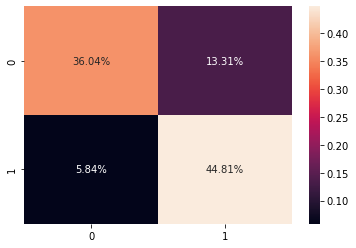

In [37]:
sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, fmt='.2%')